In [1]:
# setup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import data_preparation as dp  

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error


## 01 - Problem 

### Context
The dataset comprises customer data related to their vehicle insurance policies. It provides details about both the customers and the specific insurance coverage they've opted for. This data an be explored to segment similar kinds of customers.

### Content
This dataset provides socio-economic information of customers alongside details of their insured vehicles. The data contains both categorical and numerical variables. The "Customer Lifetime Value" (CLV) has also been provided, which is derived from historical data. This is essential in understanding the customer purchase behavior.

### Inspiration
The data is useful for clustering customers according to their behavior, thereby enabling targeted marketing of a new insurance policy. This helps pre-estimating a budget for marketing expenses.

**Data Description**

Customer: Customer ID.

ST: State where customers live.

Gender: Gender of the customer.

Education: Background education of customers.

Customer Lifetime Value: Customer Lifetime Value (CLV) is the total revenue the client will derive from their entire relationship with a customer. In other words, it is the predicted or calculated value of a customer over their entire duration as a policyholder with the insurance company. It is an estimation of the net profit that the insurance company expects to generate from a customer throughout their relationship with the company. CLV takes into account factors such as the duration of the customer's policy, premium payments, claim history, renewal likelihood, and potential additional services or products the customer may purchase. It helps insurers assess the long-term profitability and value associated with retaining a particular customer.

Income: Customer's earnings.

Monthly Premium Auto: The monthly premium amount a customer pays for their auto insurance. It represents the recurring cost that the insured person must pay to maintain their insurance policy and receive coverage for potential damages, accidents, or other covered events related to their vehicle.

Number of Open Complaints: Number of complaints the customer has opened.

Policy Type: Insurance policy categories include Corporate Auto, Personal Auto, and Special Auto.

Vehicle Class: Specifies the class of insured vehicles, such as Two-Door Car, Four-Door Car SUV, Luxury SUV, Sports Car, and Luxury Car.

Total Claim Amount: The sum of all claims made by the customer. It represents the total monetary value of all approved claims for incidents such as accidents, theft, vandalism, or other covered events.

### Goal
- Pre-estimation for marketing expenses
- enabling targeted marketing of new insurance companies

## 02 - Getting Data

In [2]:
# retrieve dataset
url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv"
insurance_data = pd.read_csv(url)

## 03 - Cleaning/Wrangling/EDA

## Cleaning and wrangling data 

In [3]:
# clean data, naming columns, NaN values, duplicates.. 
insurance_data = dp.clean_insurance_data(insurance_data)

# def clean_insurance_data(df):
#     #rename columns 
#     df.rename(columns=str.lower, inplace=True)
#     df.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)
#     df = df.rename(columns={'st':'state'})
    
#     #df.columns = df.columns.str.lower().str.replace(" ", "_")

#     #remove duplicates
#     df = df.drop_duplicates()

#     # fix values
#     # gender
#     df['gender'] = df['gender'].replace({'female': 'F', 'Femal': 'F', 'Male': 'M'})
#     # state 
#     df['state'] = df['state'].replace({'WA': 'Washington', 'AZ': 'Arizona', 'Cali': 'California'})
#     # education
#     df['education'] = df['education'].replace({'Bachelors': 'Bachelor'})
#     # customer_lifetime_value
#     df['customer_lifetime_value'] = df['customer_lifetime_value'].map(lambda x: x.replace('%', '') if isinstance(x, str) else x)
#     # vehicle_class
#     df['vehicle_class'] = df['vehicle_class'].replace({'Luxury SUV': 'Luxury','Luxury Car': 'Luxury'})

#     # formatting data types
#     df['number_of_open_complaints'] = df['number_of_open_complaints'].map(lambda x: x.split('/')[1] if isinstance(x, str) else x)
#     df['customer_lifetime_value'] = pd.to_numeric(df['customer_lifetime_value'], errors="coerce")

#     # handle null values
#     # drop row(s) that only have nan value
#     df.dropna(axis = 0, how = 'all', inplace = True)
#     # drop customer_lifetime_value 
#     df.dropna(subset=['customer_lifetime_value'], inplace=True)
#     # fill gender
#     df['gender'].fillna('O', inplace=True)

#     #reset index
#     df = df.reset_index(drop=True)

#     return df

In [4]:
# retrieve numerical and categorical data 
numerical = insurance_data.select_dtypes(include=np.number)
print("Numerical data:")
print(numerical.columns.tolist())
categorical = insurance_data.select_dtypes(include=object)
print("Categorical data:")
print(categorical.columns.tolist())

Numerical data:
['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount']
Categorical data:
['customer', 'state', 'gender', 'education', 'number_of_open_complaints', 'policy_type', 'vehicle_class']


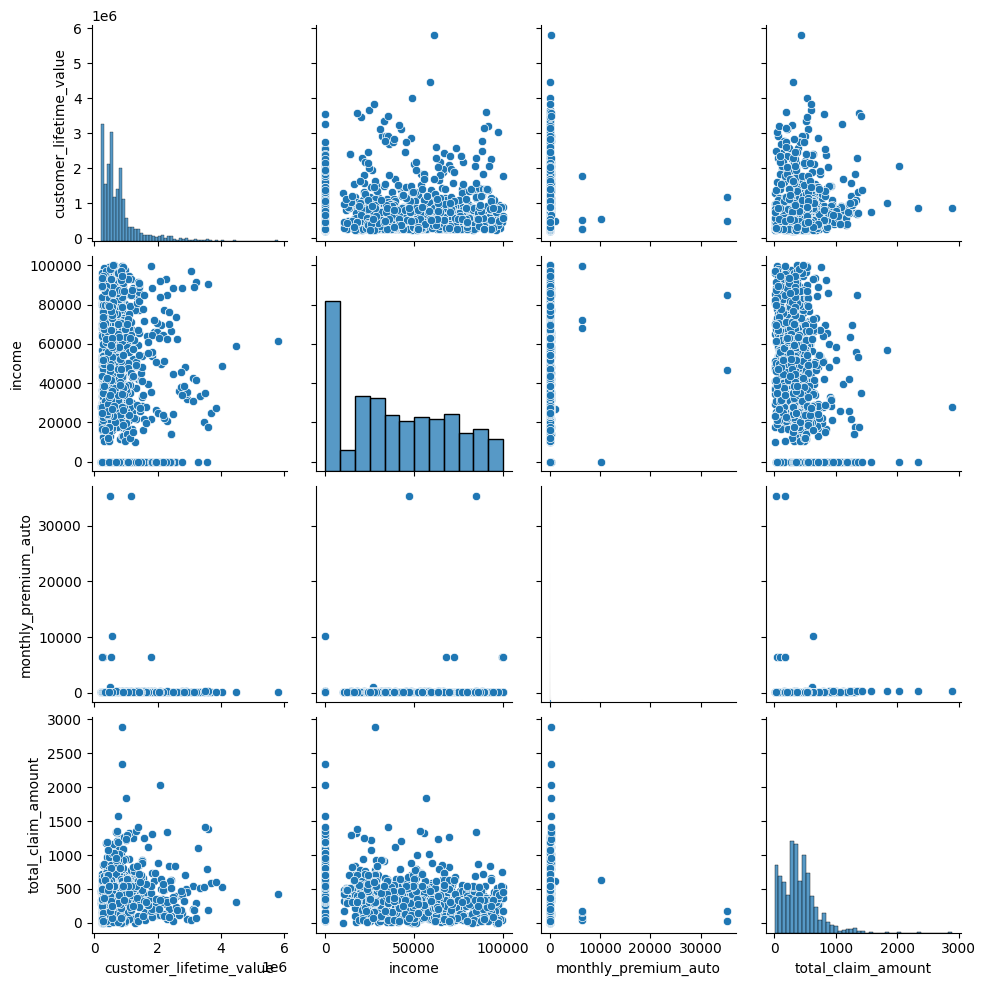

In [5]:
sns.pairplot(insurance_data)

### EDA

In [6]:
# dataFrame information
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   1068 non-null   object 
 1   state                      1068 non-null   object 
 2   gender                     1068 non-null   object 
 3   education                  1068 non-null   object 
 4   customer_lifetime_value    1068 non-null   float64
 5   income                     1068 non-null   float64
 6   monthly_premium_auto       1068 non-null   float64
 7   number_of_open_complaints  1068 non-null   object 
 8   policy_type                1068 non-null   object 
 9   vehicle_class              1068 non-null   object 
 10  total_claim_amount         1068 non-null   float64
dtypes: float64(4), object(7)
memory usage: 91.9+ KB


#### Numerical

In [7]:
# numerical data overview
nuemrical_summary = insurance_data.describe().T
nuemrical_summary['iqr'] = nuemrical_summary['75%']-nuemrical_summary['25%'] # interquartile range
nuemrical_summary['range'] = nuemrical_summary['max']-nuemrical_summary['min'] # regular range 
nuemrical_summary

,count,mean,std,min,25%,50%,75%,max,iqr,range
customer_lifetime_value,1068.0,793690.259345,643478.410278,200435.070000,403407.99500,588174.235,896287.1975,5.816655e+06,492879.20250,5.616220e+06
income,1068.0,39315.411985,30484.373979,0.000000,14072.00000,36226.000,64668.7500,9.996000e+04,50596.75000,9.996000e+04
monthly_premium_auto,1068.0,192.691948,1603.241719,61.000000,68.00000,82.500,109.2500,3.535400e+04,41.25000,3.529300e+04
total_claim_amount,1068.0,405.870113,292.917158,0.382107,204.07146,355.200,532.8000,2.893240e+03,328.72854,2.892858e+03


#### Correlation Matrix

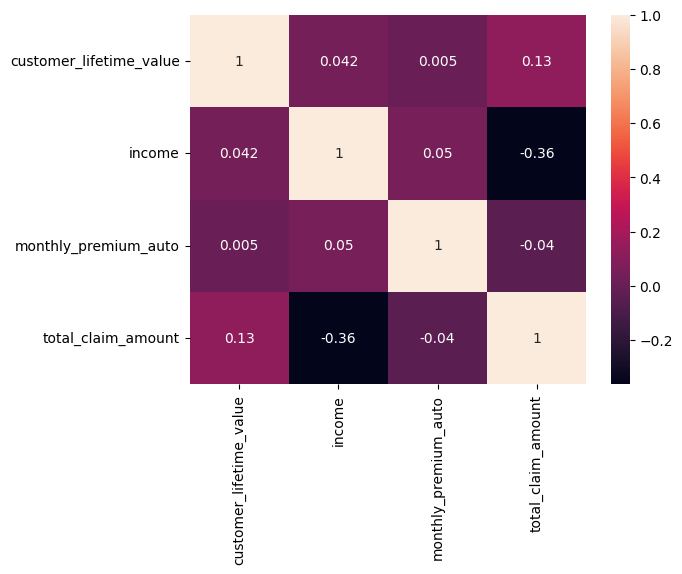

In [8]:
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [9]:
# as table
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
customer_lifetime_value,1.000000,0.041648,0.005027,0.131686
income,0.041648,1.000000,0.049803,-0.363539
monthly_premium_auto,0.005027,0.049803,1.000000,-0.040038
total_claim_amount,0.131686,-0.363539,-0.040038,1.000000


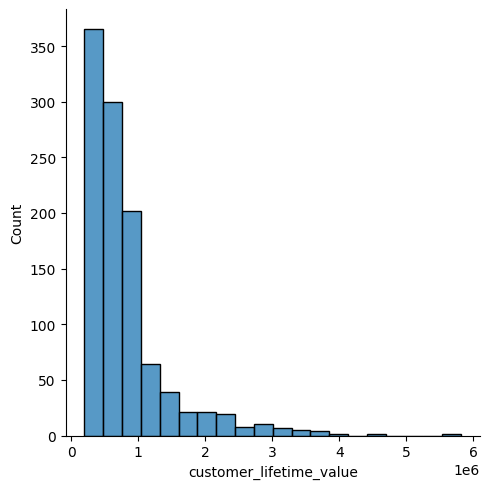

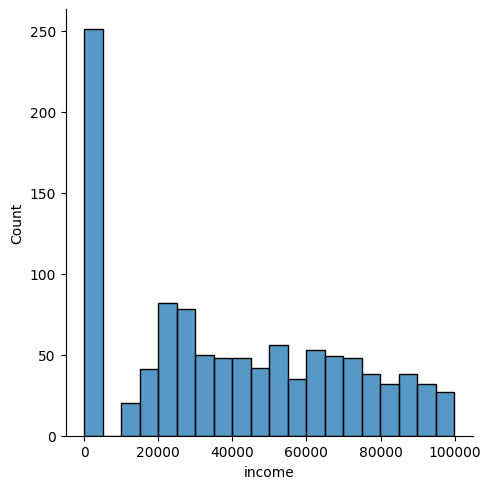

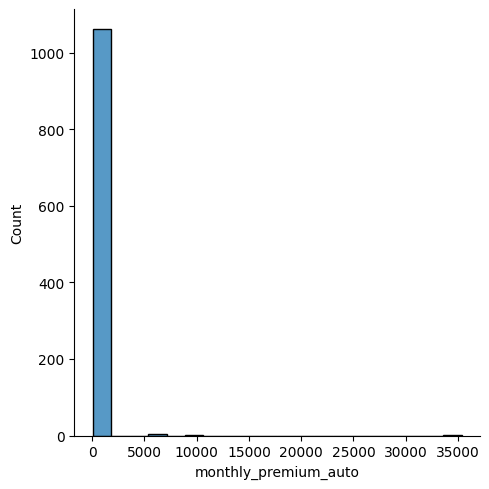

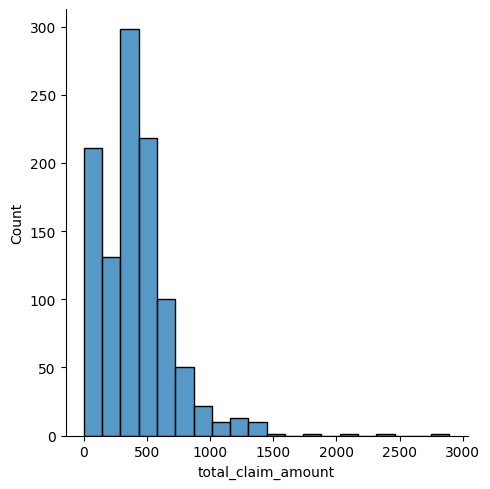

In [10]:
for column in numerical:
    sns.displot(insurance_data[column], bins=20)

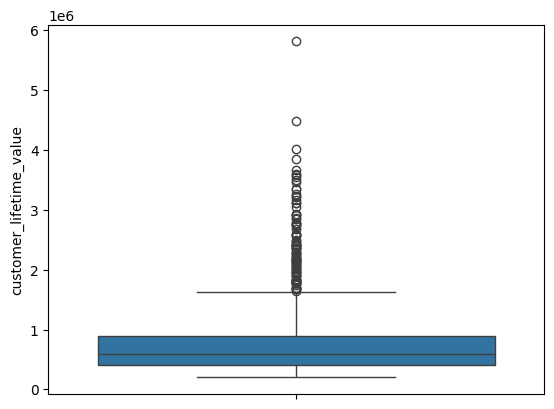

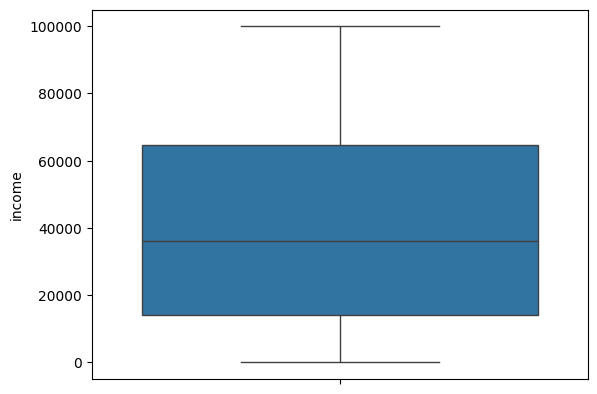

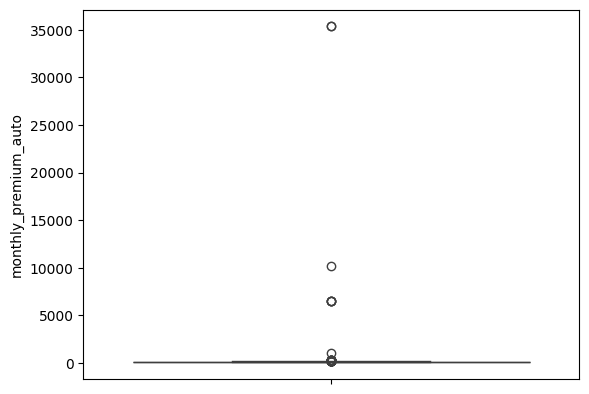

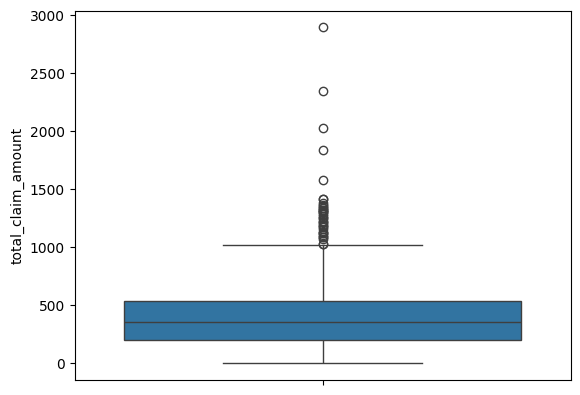

In [11]:
for column in numerical:
    sns.boxplot(y=column, data=insurance_data)
    plt.show()

- check for outliers (customer_lifetime_value, monthly_premium_auto, total_claim_amount)

## 04 - Processing Data

### Dealing with outliers.

In [12]:
# removing outliers customer_lifetime_value
iqr = np.percentile(insurance_data['customer_lifetime_value'],75) - np.percentile(insurance_data['customer_lifetime_value'],25)
upper_limit = np.percentile(insurance_data['customer_lifetime_value'],75) + 1.5*iqr
lower_limit = np.percentile(insurance_data['customer_lifetime_value'],25) - 1.5*iqr

insurance_data = insurance_data[(insurance_data['customer_lifetime_value']>lower_limit) & (insurance_data['customer_lifetime_value']<upper_limit)].copy()
#sns.displot(insurance_data['customer_lifetime_value'])
#plt.show()
#sns.boxplot(y='customer_lifetime_value', data=insurance_data)
#plt.show()

In [13]:
# removing outliers income, removing all that have 0 as income
insurance_data = insurance_data[(insurance_data['income']>0)].copy()
# sns.displot(insurance_data['income'])
# plt.show()

In [14]:
# removing outliers monthly_premium_auto

#look at ranges
insurance_data['monthly_premium_auto'].describe().T

iqr = np.percentile(insurance_data['monthly_premium_auto'],75) - np.percentile(insurance_data['monthly_premium_auto'],25)
upper_limit = np.percentile(insurance_data['monthly_premium_auto'],75) + 1.5*iqr
lower_limit = np.percentile(insurance_data['monthly_premium_auto'],25) - 1.5*iqr

insurance_data = insurance_data[(insurance_data['monthly_premium_auto']>lower_limit) & (insurance_data['monthly_premium_auto']<upper_limit)].copy()
# sns.displot(insurance_data['monthly_premium_auto'])
# plt.show()
# sns.boxplot(y='monthly_premium_auto', data=insurance_data)
# plt.show()

In [15]:
# removing outliers total_claim_amount
iqr = np.percentile(insurance_data['total_claim_amount'],75) - np.percentile(insurance_data['total_claim_amount'],25)
upper_limit = np.percentile(insurance_data['total_claim_amount'],75) + 1.5*iqr
lower_limit = np.percentile(insurance_data['total_claim_amount'],25) - 1.5*iqr

insurance_data = insurance_data[(insurance_data['total_claim_amount']>lower_limit) & (insurance_data['total_claim_amount']<upper_limit)].copy()
# sns.displot(insurance_data['total_claim_amount'])
# plt.show()
# sns.boxplot(y='total_claim_amount', data=insurance_data)
# plt.show()

### Normalization.

In [16]:
# retieeve numerical data to normalize 
X_numerical= insurance_data.select_dtypes(include = np.number)

In [17]:
# taking a look at the data 
insurance_data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,710.0,623048.588239,313334.956726,222707.280000,376384.455000,547663.2,829215.032500,1.630197e+06
income,710.0,51408.874648,24431.592925,10269.000000,28822.750000,49689.5,70585.000000,9.996000e+04
monthly_premium_auto,710.0,85.984507,22.066537,61.000000,67.000000,77.0,105.000000,1.600000e+02
total_claim_amount,710.0,321.558954,201.036556,0.382107,141.830276,321.6,467.439432,9.385134e+02


In [18]:
# fit onto X_numerical
transformer = MinMaxScaler().fit(X_numerical)
X_normalized = transformer.transform(X_numerical)
# turn into df 
X_normalized = pd.DataFrame(X_normalized, columns=X_numerical.columns)
#x_normalized

### Encoding Categorical Data.

In [19]:
# get categorial data for encoding
X_categorical = insurance_data.select_dtypes(include = object)
#X_categorical

In [20]:
# because of the amount of ordinal columns I'm choosing the label encoding (hot encoding would add a lot more columns, model want to be slim)

labels_categorical= pd.DataFrame()

for column in X_categorical:
    encoded_label = LabelEncoder().fit_transform(X_categorical[column])
    labels_categorical[column] = encoded_label

X_categorical = labels_categorical
X_categorical.head(4)

,customer,state,gender,education,number_of_open_complaints,policy_type,vehicle_class
0,5,2,0,0,0,1,3
1,168,4,1,3,0,1,0
2,377,3,0,0,0,1,3
3,659,3,0,1,0,0,0


### Splitting into train set and test set.

In [21]:
X_normalized.head(1)

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,0.757402,0.429229,0.474747,0.603423


In [22]:
# concatenate normalized numeric and scaled categorical data
insurance_data = pd.concat([X_normalized, X_categorical], axis=1)
insurance_data.head(1)

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount,customer,state,gender,education,number_of_open_complaints,policy_type,vehicle_class
0,0.757402,0.429229,0.474747,0.603423,5,2,0,0,0,1,3


In [23]:
# setting y (target) as total_claim_amount 
y = insurance_data['total_claim_amount']
# set X to all columns, minus the target
X = insurance_data.drop(['total_claim_amount'], axis=1)
X.head(1)

,customer_lifetime_value,income,monthly_premium_auto,customer,state,gender,education,number_of_open_complaints,policy_type,vehicle_class
0,0.757402,0.429229,0.474747,5,2,0,0,0,1,3


In [24]:
# split into train and test set, test size 10%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## 05 - Modeling

### Apply model

In [25]:
# train/fit model 
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [26]:
# get predictions data and test data
predictions = lm.predict(X_train)
predictions_test = lm.predict(X_test)

## 06 - Model Validation

In [27]:
print("R2-score is ", lm.score(X,y))
print("MSE is ", mean_squared_error(y_test,predictions_test))
print("RMSE-score is ", np.sqrt(mean_squared_error(y_test,predictions_test)))
print("MAE-score is ", mean_absolute_error(y_test, predictions_test))

R2-score is  0.2854823709689597
MSE is  0.037602700137078664
RMSE-score is  0.19391415661853742
MAE-score is  0.15470321089630476


## 07 - Reporting

- R2-score low -- model explains about 28.5% of the variance observed in the target variable -- only small portion
- MSE, RMSE, and MAE values show that the model's prediction have a low level of error -- lower magnitute 